In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster




In [16]:
parks.columns

Index(['school', 'community', 'city', 'zipcode', 'acres', 'name', 'football_m',
       'classifica', 'shape_area', 'camping', 'disc_golf', 'email', 'lake',
       'state', 'url', 'council_d', 'year_estab', 'swimming', 'fishing',
       'par_finder', 'concession', 'mountain_b', 'tennis', 'canoe_laun',
       'boating', 'objectid', 'common_nam', 'picnic_no', 'horse', 'park_id',
       'shape_leng', 'nickname_s', 'playground', 'hours', 'spray_park',
       'park_num', 'days_open', 'basketball', 'status', 'picnic', 'maint',
       'nature_cen', 'address', 'lon', 'skate_park', 'ada', 'notes',
       'walk_jog', 'soccer', 'baseball', 'hiking', 'golf', 'community_1',
       'images', 'historic', 'restroom', 'lat', 'volleyball', 'phone',
       'descriptio', 'dog_park', 'geometry'],
      dtype='object')

In [17]:
bike_racks.columns

Index(['detail_loc', 'quantity', 'location', 'domain', 'idnumber', 'objectid',
       'status', 'lon', 'type', 'data_colle', 'lat', 'capacity', 'geometry'],
      dtype='object')

In [3]:
parks = gpd.read_file('../data/parks.geojson')
print(parks.crs)
parks.head( )

EPSG:4326


,school,community,city,zipcode,acres,name,football_m,classifica,shape_area,camping,...,community_1,images,historic,restroom,lat,volleyball,phone,descriptio,dog_park,geometry
0,NaN,No,Antioch,37013,622,Mill Ridge Park,NaN,NaN,27005433.936,NaN,...,NaN,NaN,Yes,No,0,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-86.61072 36.01596, -86.61072 ..."
1,NaN,No,Antioch,37013,23.94,NaN,NaN,NaN,1038220.47526,NaN,...,NaN,NaN,NaN,No,0,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-86.64436 36.04331, -86.64399 ..."
2,No,No,Madison,37115,10.25,NaN,No,<Null>,436585.60938,No,...,No,NaN,No,No,1773033.44088,No,NaN,Under development,No,"MULTIPOLYGON (((-86.66357 36.24040, -86.66203 ..."
3,NaN,No,Nashville,37204,1.41582132469,NaN,No,NaN,61672.9302239,NaN,...,NaN,NaN,NaN,No,0,No,NaN,NaN,NaN,"MULTIPOLYGON (((-86.77956 36.11125, -86.77960 ..."
4,NaN,No,Nashville,37221,0.48,NaN,NaN,NaN,22116.8493151,NaN,...,NaN,NaN,NaN,No,0,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-86.94581 36.05387, -86.94600 ..."


In [6]:
type(parks)

geopandas.geodataframe.GeoDataFrame

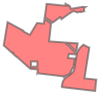

In [7]:
parks.loc[0, 'geometry']

In [8]:
print(parks.loc[0, 'geometry'])

MULTIPOLYGON (((-86.61071546296412 36.01595663150259, -86.61071547338727 36.015956544024625, -86.61280639518766 36.0161997614678, -86.61820738492892 36.01682818261713, -86.61951485065684 36.01698272300915, -86.6195995484663 36.01713365475428, -86.61938321904425 36.01809956327503, -86.61940087756943 36.01810908745387, -86.61939760319254 36.01812283996395, -86.61939172471608 36.018149515053985, -86.61938250872069 36.018181980973395, -86.61937295546598 36.018214448625976, -86.61936272544752 36.01824691525066, -86.61935215604908 36.01827911142874, -86.61934124716461 36.018311308450016, -86.61932966266617 36.018343509844584, -86.61931773765575 36.018375438094566, -86.61930513488157 36.01840709493376, -86.61929253209614 36.01843875177159, -86.61927891421853 36.01847041382581, -86.61926529418784 36.018501800995644, -86.6192509974299 36.01853319254352, -86.61923602289816 36.01856431177827, -86.61922104836071 36.01859543191237, -86.61920539605083 36.01862627973309, -86.61918906486967 36.0186568

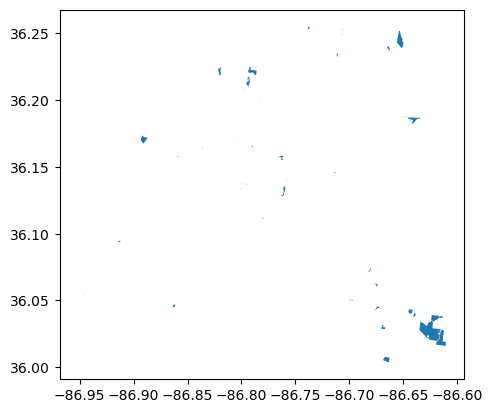

In [9]:
parks.plot();

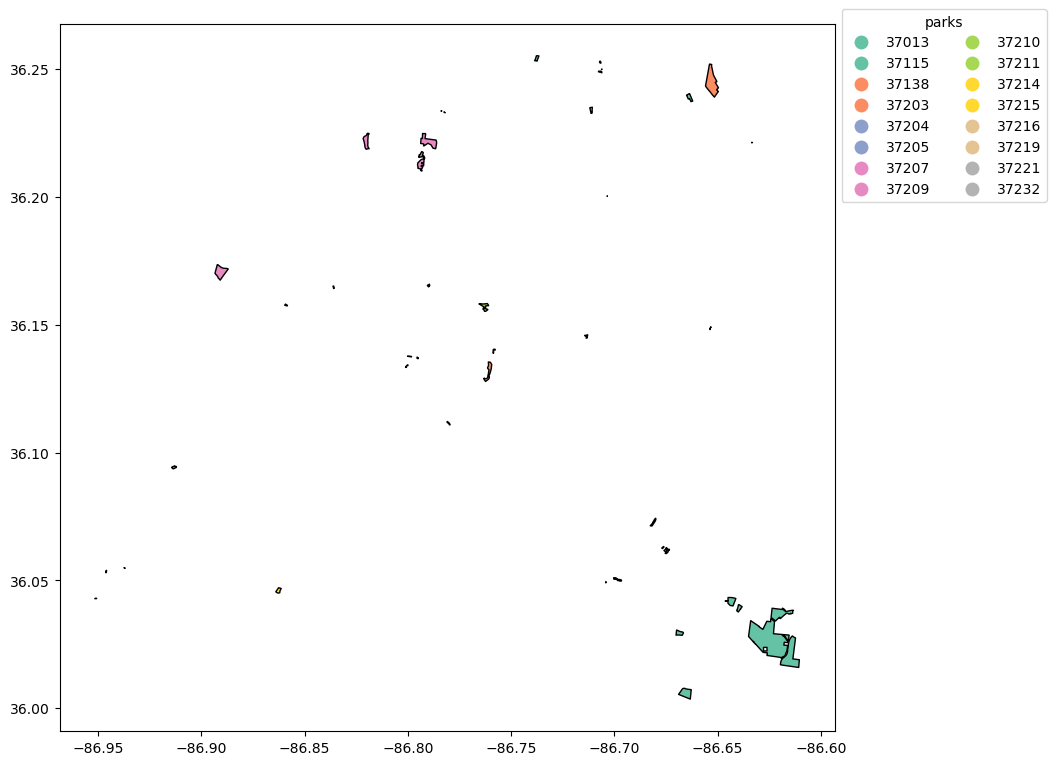

In [19]:
leg_kwds = {'title': 'parks', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

parks.plot(column = 'zipcode', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [20]:
bike_racks = gpd.read_file('../data/bike_racks.geojson')
print(bike_racks.crs)
bike_racks.head( )

EPSG:4326


,detail_loc,quantity,location,domain,idnumber,objectid,status,lon,type,data_colle,lat,capacity,geometry
0,Hickory Hollow Mall,1,Mall,Public,113,1,Existing,-86.6554527779,Rack,Health Dept,36.0499277778,12,POINT (-86.65545 36.04993)
1,Stones River Greenway - Donelson/Hermitage Area,2,Greenway,Public,114,2,Existing,-86.6340625226,Rack,Health Dept,36.1852800378,4,POINT (-86.63406 36.18528)
2,"Percy Priest Reservoir, Stones River Greenway",0,Park/Greenway,Public,256,3,Proposed,-86.6206705697,Rack,Health Dept,36.1584215986,0,POINT (-86.62067 36.15842)
3,"Two Rivers Golf Course, Stones River Greenway ...",1,Park/Greenway,Public,115,4,Existing,-86.6865259267,Rack,Health Dept,36.1875466948,5,POINT (-86.68653 36.18755)
4,East Park & Community Center,3,Park/Community Center,Public,103,5,Existing,-86.7621800831,Rack,Health Dept,36.1724554062,15,POINT (-86.76218 36.17246)


In [21]:
bike_racks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   detail_loc  430 non-null    object  
 1   quantity    430 non-null    object  
 2   location    430 non-null    object  
 3   domain      430 non-null    object  
 4   idnumber    430 non-null    object  
 5   objectid    430 non-null    object  
 6   status      430 non-null    object  
 7   lon         426 non-null    object  
 8   type        430 non-null    object  
 9   data_colle  430 non-null    object  
 10  lat         426 non-null    object  
 11  capacity    430 non-null    object  
 12  geometry    430 non-null    geometry
dtypes: geometry(1), object(12)
memory usage: 43.8+ KB


In [27]:
bike_racks['geometry'] = bike_racks.apply(lambda x: Point((x.lat, 
                                                         x.lng)), 
                                        axis=1)
bike_racks.head(3)

AttributeError: 'Series' object has no attribute 'lng'